# DLthon - 길찾은 오리들
## Base Settings

In [1]:
# importing the libraries
import keras, tensorflow as tf
from keras import layers

# keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

2025-01-20 17:53:16.868042: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 17:53:16.993441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737363197.046814  416673 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737363197.062890  416673 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 17:53:17.197679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_disruptive_feature_exclusion")

Found 374 files belonging to 6 classes.
Using 300 files for training.


I0000 00:00:1737363199.864358  416673 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 374 files belonging to 6 classes.
Using 74 files for validation.


In [3]:
# designing the model

def eV2L_simple2(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L((224, 224, 3))(inputs, training=False)
    x = models_top.simple2()(x)
    outputs = layers.Dense(6, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])
    
    return model

Epoch 1/200


I0000 00:00:1737363229.530840  416802 service.cc:148] XLA service 0x7f2f64001fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737363229.531114  416802 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-20 17:53:50.477185: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737363234.192551  416802 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-20 17:54:01.045673: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47276_0', 428 bytes spill stores, 684 bytes spill loads

2025-01-20 17:54:01.206243: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47661', 44

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.1895 - loss: 1.7990

2025-01-20 17:54:33.257036: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47276', 8 bytes spill stores, 8 bytes spill loads

2025-01-20 17:54:33.506619: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47276_0', 8 bytes spill stores, 8 bytes spill loads

2025-01-20 17:54:33.531803: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47276', 252 bytes spill stores, 252 bytes spill loads

2025-01-20 17:54:33.779556: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47661', 12 bytes spill stores, 12 bytes spill loads

2025-01-20 17:54:33.899621: I external/local_xla/xla/str

5/5 ━━━━━━━━━━━━━━━━━━━━ 99s 11s/step - accuracy: 0.1896 - loss: 1.7976 - val_accuracy: 0.3594 - val_loss: 1.7038
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 766ms/step - accuracy: 0.3470 - loss: 1.6634 - val_accuracy: 0.2656 - val_loss: 1.6499
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 954ms/step - accuracy: 0.3298 - loss: 1.6195 - val_accuracy: 0.3438 - val_loss: 1.5552
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 759ms/step - accuracy: 0.4245 - loss: 1.4968 - val_accuracy: 0.4062 - val_loss: 1.4915
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 834ms/step - accuracy: 0.5068 - loss: 1.3618 - val_accuracy: 0.4375 - val_loss: 1.3434
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 856ms/step - accuracy: 0.5489 - loss: 1.2905 - val_accuracy: 0.6250 - val_loss: 1.2671
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.5458 - loss: 1.1981 - val_accuracy: 0.3594 - val_loss: 1.6582
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 762ms/step - accuracy: 0.5463 - loss: 1.1951 - val_accuracy: 0.5625 - val_loss: 1.15

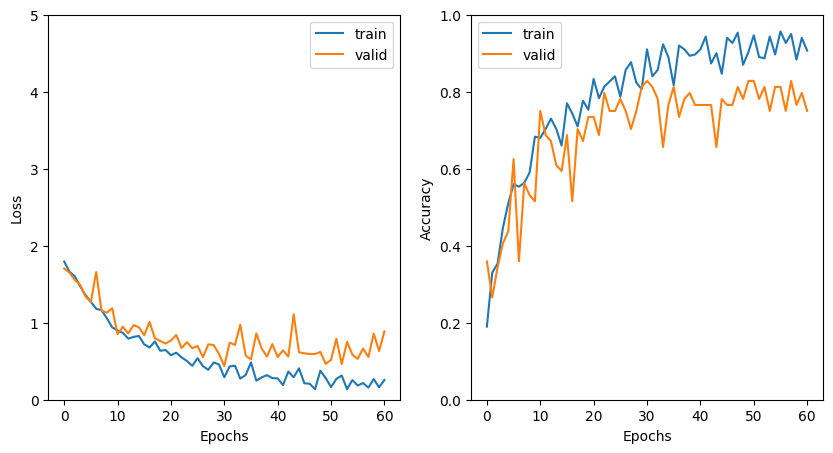

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.8000 - loss: 0.3208
Test accuracy: 0.80%, Test loss: 0.32


In [4]:
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2.keras'),
        utils.callback_earlystop(30)
    ],
)

In [5]:
utils.plot_history(eV2L_simple2_history)

Epoch 1/200


2025-01-20 17:57:55.066410: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47280', 228 bytes spill stores, 228 bytes spill loads

2025-01-20 17:57:55.204740: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47280_0', 428 bytes spill stores, 684 bytes spill loads

2025-01-20 17:57:55.806894: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47686', 440 bytes spill stores, 440 bytes spill loads

2025-01-20 17:57:55.831207: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47684', 496 bytes spill stores, 496 bytes spill loads

2025-01-20 17:57:55.905550: I external/local_x

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.1768 - loss: 1.8233

2025-01-20 17:58:25.638655: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47280_0', 8 bytes spill stores, 8 bytes spill loads

2025-01-20 17:58:26.027700: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47280', 8 bytes spill stores, 8 bytes spill loads

2025-01-20 17:58:26.112467: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47280', 252 bytes spill stores, 252 bytes spill loads

2025-01-20 17:58:26.477758: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47684', 64 bytes spill stores, 64 bytes spill loads

2025-01-20 17:58:26.738128: I external/local_xla/xla/str

5/5 ━━━━━━━━━━━━━━━━━━━━ 95s 11s/step - accuracy: 0.1889 - loss: 1.8166 - val_accuracy: 0.1719 - val_loss: 1.7758
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - accuracy: 0.2333 - loss: 1.7218 - val_accuracy: 0.2188 - val_loss: 1.8326
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.2789 - loss: 1.7050 - val_accuracy: 0.3125 - val_loss: 1.6493
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 702ms/step - accuracy: 0.3308 - loss: 1.6685 - val_accuracy: 0.3906 - val_loss: 1.4490
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.4828 - loss: 1.4185 - val_accuracy: 0.2656 - val_loss: 1.6953
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.4170 - loss: 1.4073 - val_accuracy: 0.3906 - val_loss: 1.4791
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 747ms/step - accuracy: 0.4473 - loss: 1.2895 - val_accuracy: 0.5312 - val_loss: 1.2562
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 849ms/step - accuracy: 0.5461 - loss: 1.2485 - val_accuracy: 0.6094 - val_loss: 1.10

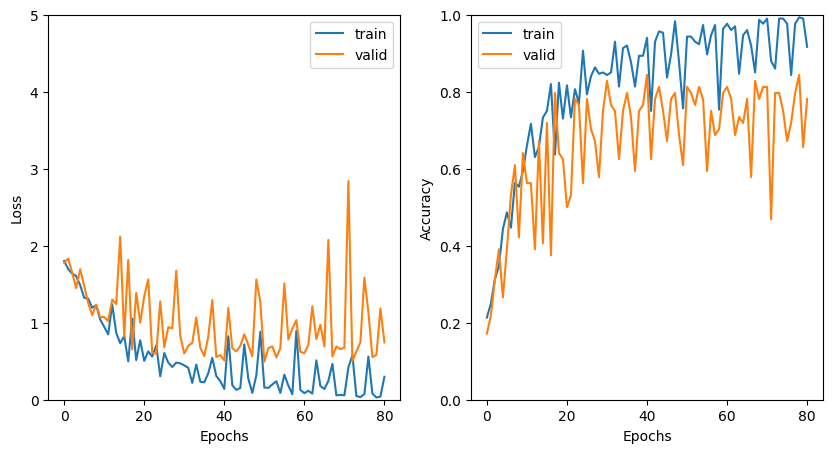

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9000 - loss: 0.4696
Test accuracy: 0.90%, Test loss: 0.47


In [6]:
eV2L_simple2_history_best = keras.models.load_model('eV2L_simple2.keras')
test_loss, test_acc = eV2L_simple2_history_best.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

## Second Trial: MobileNetV2 + Top1

In [ ]:
def mV2_simple1():
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.MV2()(inputs, training=False)
    x = models_top.simple1()(x)
    outputs = layers.Dense(6, activation='softmax')(x)

    model = keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

    return model

mV2_simple1_history = mV2_simple1().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('mV2_simple1.keras'),
        utils.callback_earlystop(80)
    ],
)

In [ ]:
utils.plot_history(mV2_simple1_history)

In [ ]:
mV2_simple1_best = keras.models.load_model('mV2_simple1.keras')
test_loss, test_acc = mV2_simple1_best.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")